In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.testing
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [2]:
trainData = pd.read_csv("train.csv")

In [3]:
#trainData.info()

In [4]:
#trainData.head(20)

In [5]:
#trainData.describe()

In [6]:
X_train = trainData[['PoolArea','GarageArea','LotFrontage',
                     'LotArea','YearBuilt']] 

X_train.head()
X_train.describe()

,PoolArea,GarageArea,LotFrontage,LotArea,YearBuilt
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000
mean,2.758904,472.980137,70.049958,10516.828082,1971.267808
std,40.177307,213.804841,24.284752,9981.264932,30.202904
min,0.000000,0.000000,21.000000,1300.000000,1872.000000
25%,0.000000,334.500000,59.000000,7553.500000,1954.000000
50%,0.000000,480.000000,69.000000,9478.500000,1973.000000
75%,0.000000,576.000000,80.000000,11601.500000,2000.000000
max,738.000000,1418.000000,313.000000,215245.000000,2010.000000


In [7]:
X_train.info()

X_train['LotFrontage'].fillna(70,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
PoolArea       1460 non-null int64
GarageArea     1460 non-null int64
LotFrontage    1201 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
X_train.info()
Y_train = trainData['SalePrice']

Y_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
PoolArea       1460 non-null int64
GarageArea     1460 non-null int64
LotFrontage    1460 non-null float64
LotArea        1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: float64(1), int64(4)
memory usage: 57.1 KB


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [11]:
X_train['YearBuilt'] = X_train['YearBuilt'].apply(lambda x: 2018-x)
#X_train['YearBuilt'] = 2018 - X_train['YearBuilt']

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# OUTLIER

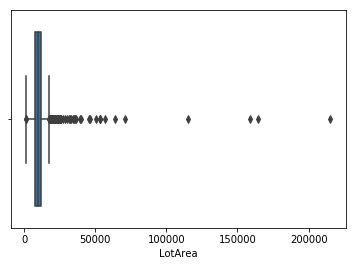

In [12]:
import seaborn as sns
attrList = ['GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt','SalePrice']

sns.boxplot(x=trainData['LotArea'])

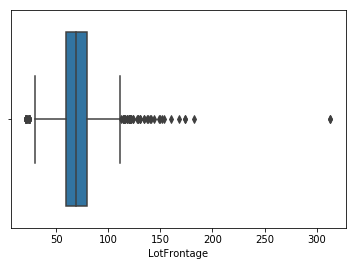

In [13]:
sns.boxplot(x=trainData['LotFrontage'])

In [14]:
trainData_set = trainData[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt','SalePrice']] 

In [15]:
Q1 = trainData_set.quantile(0.25)
Q3 = trainData_set.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

PoolArea           0.0
GarageArea       241.5
LotFrontage       21.0
LotArea         4048.0
YearBuilt         46.0
SalePrice      84025.0
dtype: float64


In [16]:
print(IQR.index)
for x in IQR.index:
    print(x,IQR[x])

Index(['PoolArea', 'GarageArea', 'LotFrontage', 'LotArea', 'YearBuilt',
       'SalePrice'],
      dtype='object')
PoolArea 0.0
GarageArea 241.5
LotFrontage 21.0
LotArea 4048.0
YearBuilt 46.0
SalePrice 84025.0


In [17]:
# For Lot Area
#  4048

print(IQR['LotArea'])

4048.0


In [18]:
print('Lower:',Q1 - 1.5 * IQR)
print('Upper:',Q3 + 1.5 * IQR)

Lower: PoolArea          0.00
GarageArea      -27.75
LotFrontage      27.50
LotArea        1481.50
YearBuilt      1885.00
SalePrice      3937.50
dtype: float64
Upper: PoolArea            0.00
GarageArea        938.25
LotFrontage       111.50
LotArea         17673.50
YearBuilt        2069.00
SalePrice      340037.50
dtype: float64


In [19]:
trainData_set['LotArea'].where( trainData_set['LotArea'] > 17700).count()

67

In [20]:
trainData_set['LotArea'].where( trainData_set['LotArea'] < 1480).count()

2

In [21]:
trainData_set_Out = trainData_set[~((trainData_set < (Q1 - 1.5 * IQR)) |
                                    (trainData_set > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
trainData_set_Out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1256 entries, 0 to 1459
Data columns (total 6 columns):
PoolArea       1256 non-null int64
GarageArea     1256 non-null int64
LotFrontage    1027 non-null float64
LotArea        1256 non-null int64
YearBuilt      1256 non-null int64
SalePrice      1256 non-null int64
dtypes: float64(1), int64(5)
memory usage: 68.7 KB


In [23]:
trainData_set.drop(trainData_set[trainData_set.LotArea > 17763].index,inplace=True)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [24]:
trainData_set_Out['LotArea'].where( trainData_set_Out['LotArea'] > 17700).count()

0

In [25]:
#trainData_set_Out['LotArea'].where( X_train_Out['LotArea'] > 17700).count()

In [27]:
#attr = ['GarageArea','PoolArea','LotFrontage','LotArea','YearBuilt']
#scatter_matrix(trainData_set_Out[attr],alpha=0.8,figsize=(12,12))

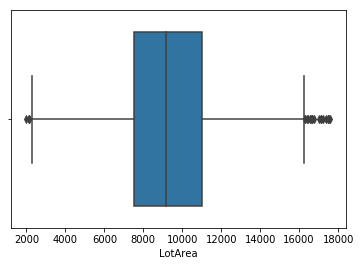

In [28]:

sns.boxplot(x=trainData_set_Out['LotArea'])

In [29]:

X_train_Out = trainData_set_Out[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt']] 
Y_train_Out = trainData_set_Out[['SalePrice']]

X_train_Out['LotFrontage'].fillna(70,inplace=True)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [30]:
from sklearn import svm

#trainData['LotArea']
X_train = trainData[['LotArea']] 

# X_train = trainData[['PoolArea','GarageArea','LotFrontage','LotArea','YearBuilt']] 

# One Class SVM

In [34]:
table = pd.concat([X_train['LotArea']], axis=1)

In [36]:
svmClf = svm.OneClassSVM()

# out = clf.fit_predict(np.array(X_train['LotArea']).reshape(-1,1))

svmClf.fit(table)

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, nu=0.5, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [37]:
outputSvm = pd.DataFrame(svmClf.fit_predict(table),columns=['y'])

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
outputSvm.head(5)

,y
0,1
1,1
2,-1
3,-1
4,-1


In [39]:
outlier_val_svm = pd.concat([outputSvm, table], axis=1)
outlier_val_svm.head(5)

,y,LotArea
0,1,8450
1,1,9600
2,-1,11250
3,-1,9550
4,-1,14260


In [40]:
outlierValuesSvm = outlier_val_svm[outlier_val_svm.y == -1]
outlierValuesSvm.describe()

,y,LotArea
count,579.0,579.000000
mean,-1.0,10048.663212
std,0.0,5954.862259
min,-1.0,1526.000000
25%,-1.0,7750.000000
50%,-1.0,9405.000000
75%,-1.0,11600.000000
max,-1.0,63887.000000


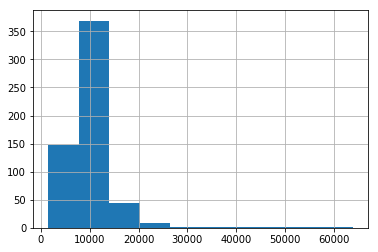

In [60]:
outlierValuesSvm['LotArea'].hist(bins=10)

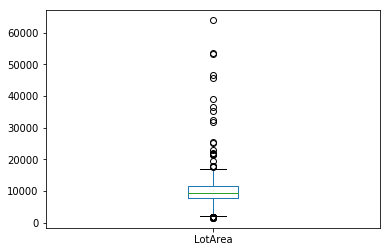

In [61]:
outlierValuesSvm['LotArea'].plot.box()

In [41]:
#print(clf1.predict( np.array(8910).reshape(-1,1) ))

In [42]:
#print(clf1.predict( np.array(5000).reshape(-1,1) ))

In [43]:
from sklearn.neighbors import LocalOutlierFactor

# Multivariate Approach:
Declaring an observation as an outlier based on a just one (rather unimportant) feature could lead to unrealistic inferences. When you have to decide if an individual entity (represented by row or observation) is an extreme value or not, it better to collectively consider the features (X’s) that matter.
A multivariate outlier is a combination of unusual scores on at least two variables.

# LocalOutlierFactor

In [44]:
lof = LocalOutlierFactor(contamination=0.25,n_neighbors=5)
lof.fit(table)
output_lof = pd.DataFrame(lof.fit_predict(table),columns=['y'])

In [45]:
output_lof.head(5)

,y
0,1
1,1
2,1
3,1
4,-1


In [46]:
outlier_val_lof = pd.concat([output_lof, table], axis=1)

In [47]:
outlier_val_lof.head(5)

,y,LotArea
0,1,8450
1,1,9600
2,1,11250
3,1,9550
4,-1,14260


In [49]:
#print(outlier_val_lof.where(outlier_val_lof['y'] == -1))
outlierValuesLof = outlier_val_lof[outlier_val_lof.y == -1]
outlierValuesLof.describe()

,y,LotArea
count,365.0,365.000000
mean,-1.0,11652.841096
std,0.0,17658.753585
min,-1.0,1300.000000
25%,-1.0,7094.000000
50%,-1.0,9525.000000
75%,-1.0,11400.000000
max,-1.0,215245.000000


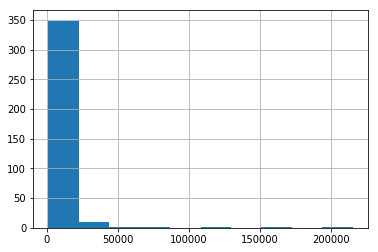

In [58]:
outlierValuesLof['LotArea'].hist(bins=10)

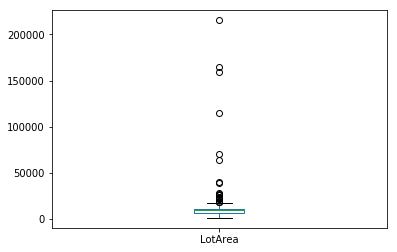

In [59]:
outlierValuesLof['LotArea'].plot.box()

# Isolation Forest

In [50]:

from sklearn.ensemble import IsolationForest

isoClf = IsolationForest(n_estimators=100)
isoClf.fit(table)
output_isof = pd.DataFrame(isoClf.predict(table),columns=['y'])

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [51]:
outlier_val_isof = pd.concat([output_isof, table], axis=1)
outlier_val_isof.head(5)

,y,LotArea
0,1,8450
1,1,9600
2,1,11250
3,1,9550
4,1,14260


In [52]:
outlierValuesIsof = outlier_val_isof[outlier_val_isof.y == -1]
outlierValuesIsof.describe()

,y,LotArea
count,146.0,146.000000
mean,-1.0,18894.369863
std,0.0,29214.842602
min,-1.0,1300.000000
25%,-1.0,2293.750000
50%,-1.0,17411.500000
75%,-1.0,22817.500000
max,-1.0,215245.000000


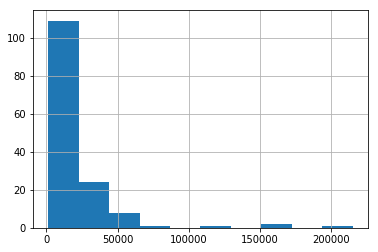

In [56]:
outlierValuesIsof['LotArea'].hist(bins=10)

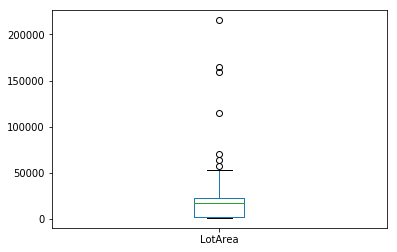

In [57]:
outlierValuesIsof['LotArea'].plot.box()

# Elliptic Envelope
An object for detecting outliers in a Gaussian distributed dataset

In [62]:
from sklearn.covariance import EllipticEnvelope

ellClf = EllipticEnvelope()
ellClf.fit(table)
output_ellClf = pd.DataFrame(ellClf.predict(table),columns=['y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a17ce1f98>]],
      dtype=object)

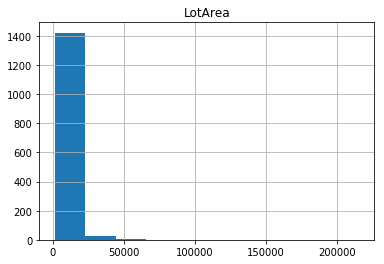

In [67]:
table.hist()

In [63]:
outlier_val_ell = pd.concat([output_ellClf, table], axis=1)
outlier_val_ell.head(5)

,y,LotArea
0,1,8450
1,1,9600
2,1,11250
3,1,9550
4,1,14260


In [64]:
outlierValuesEll = outlier_val_ell[outlier_val_ell.y == -1]
outlierValuesEll.describe()

,y,LotArea
count,144.0,144.000000
mean,-1.0,21670.666667
std,0.0,28406.212920
min,-1.0,1300.000000
25%,-1.0,2286.750000
50%,-1.0,17461.500000
75%,-1.0,23026.750000
max,-1.0,215245.000000


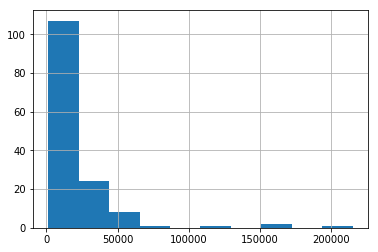

In [65]:
outlierValuesEll['LotArea'].hist(bins=10)

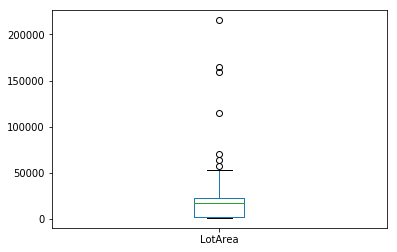

In [66]:
outlierValuesEll['LotArea'].plot.box()